# 전처리

In [15]:
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분

In [16]:
#given cities
cities = []
#solution
sol = []

# Euclidean distance measuring function

In [17]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

# 데이터를 가져오기 및 확인

In [18]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        #print(row[0]) #0행의 숫자들
        sol.append(int(row[0]))
        if(len(sol) < 10):
            print(sol[0:5])
    print('#########################################################################')
    print(sol[0:15])

[760]
[760, 21]
[760, 21, 950]
[760, 21, 950, 122]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
#########################################################################
[760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656]


# 1. get solution sequence and reorfering (sort from 0)

In [19]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        sol.append(int(row[0]))
    print('The index of 0 is :',sol.index(0))    
    #reordering solution sequence
    idx = sol.index(0) # 0이라는 숫자의 index
    
    front = sol[idx:]
    back = sol[0:idx]
    
    print('The front 0~20 is : ',front[0:20])
    print('/////////////////////////////////////////////////////////////////////////////////////////////////////////////')
    print('The back 0~20 is : ',back[0: 20])
    sol = front + back
    
    #expand 0 city (start) for simplicity
    sol.append(int(0))

The index of 0 is : 189
The front 0~20 is :  [0, 934, 200, 370, 524, 262, 982, 902, 71, 806, 744, 958, 430, 153, 81, 140, 786, 837, 634, 259]
/////////////////////////////////////////////////////////////////////////////////////////////////////////////
The back 0~20 is :  [760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656, 29, 872, 753, 165, 948]


즉 0을 기준으로 앞과 뒤를 짤라서 0 부터 시작하게 끔 자르고 마지막은 0에 도달 해야 하니깐 0을 추가                            
ex) 1 2 3 0 4 5 6             
front = 0 4 5 6           
back = 1 2 3           
sol = 0 4 5 6 1 2 3         

sol.append(int(0)) 
->최종 결과 0 4 5 6 1 2 3 0

위의 예시에서는         
0 의 index 값이 189 이므로     
front 에 189 ~ 999 index에 해당하는 숫자가 들어가고        
back 에 0 ~ 188 index에 해당하는 숫자가 들어간다

# 2. get TSP city map

In [20]:
with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)
print('cities 에 들어간 원소의 개수 :',len(cities))
print(cities[:25])

cities 에 들어간 원소의 개수 : 1000
[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214'], ['45.263493711035', '24.433107718919345'], ['51.65884282004931', '90.10642634366273'], ['89.7286579150431', '69.21655768344208'], ['39.00003159887097', '80.55196125207841'], ['35.59526184197473', '14.05610647225216'], ['66.19318558706838', '55.68426760836053'], ['34.1551559598477', '85.84359753107817'], ['37.75840849411198', '8.948084373549136'], ['65.16521495804488', '93.65696789745532'], ['42.69022506258199', '92.09116283653597'], ['34.978245803048665', '90.63114224147267'], ['31.624449741999662', '37.20161513918061'], ['64.27557457661524', '47.52318749669915'], ['83.64758869867107', '0.8456953312116822'], ['66.90344399989151', '50.71682553053572'], ['16.884423905642787', '87.22366700571314'], ['87.5480501416314', '69.49436954110595'], ['5

# 3. evaluate solution cost

In [21]:
total_cost = 0

for idx in range(len(sol)-1): #0~ 999 까지
    
    #get city positions
    pos_city_1 = [float(cities[sol[idx]][0]), float(cities[sol[idx]][1])] #현재 node의 좌표를 float형으로 가져옴
    pos_city_2 = [float(cities[sol[idx+1]][0]), float(cities[sol[idx+1]][1])] #다음 node의 좌표를 float형으로 가져옴
    
    #distance calculation
    dist = distance(pos_city_1,pos_city_2) # 두 node 사이 의 거리를 구하여서
    
    #accumulation
    total_cost += dist # 토탈에 추가
    
print('final cost: ' +str(total_cost))

final cost: 102629.4310080144


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

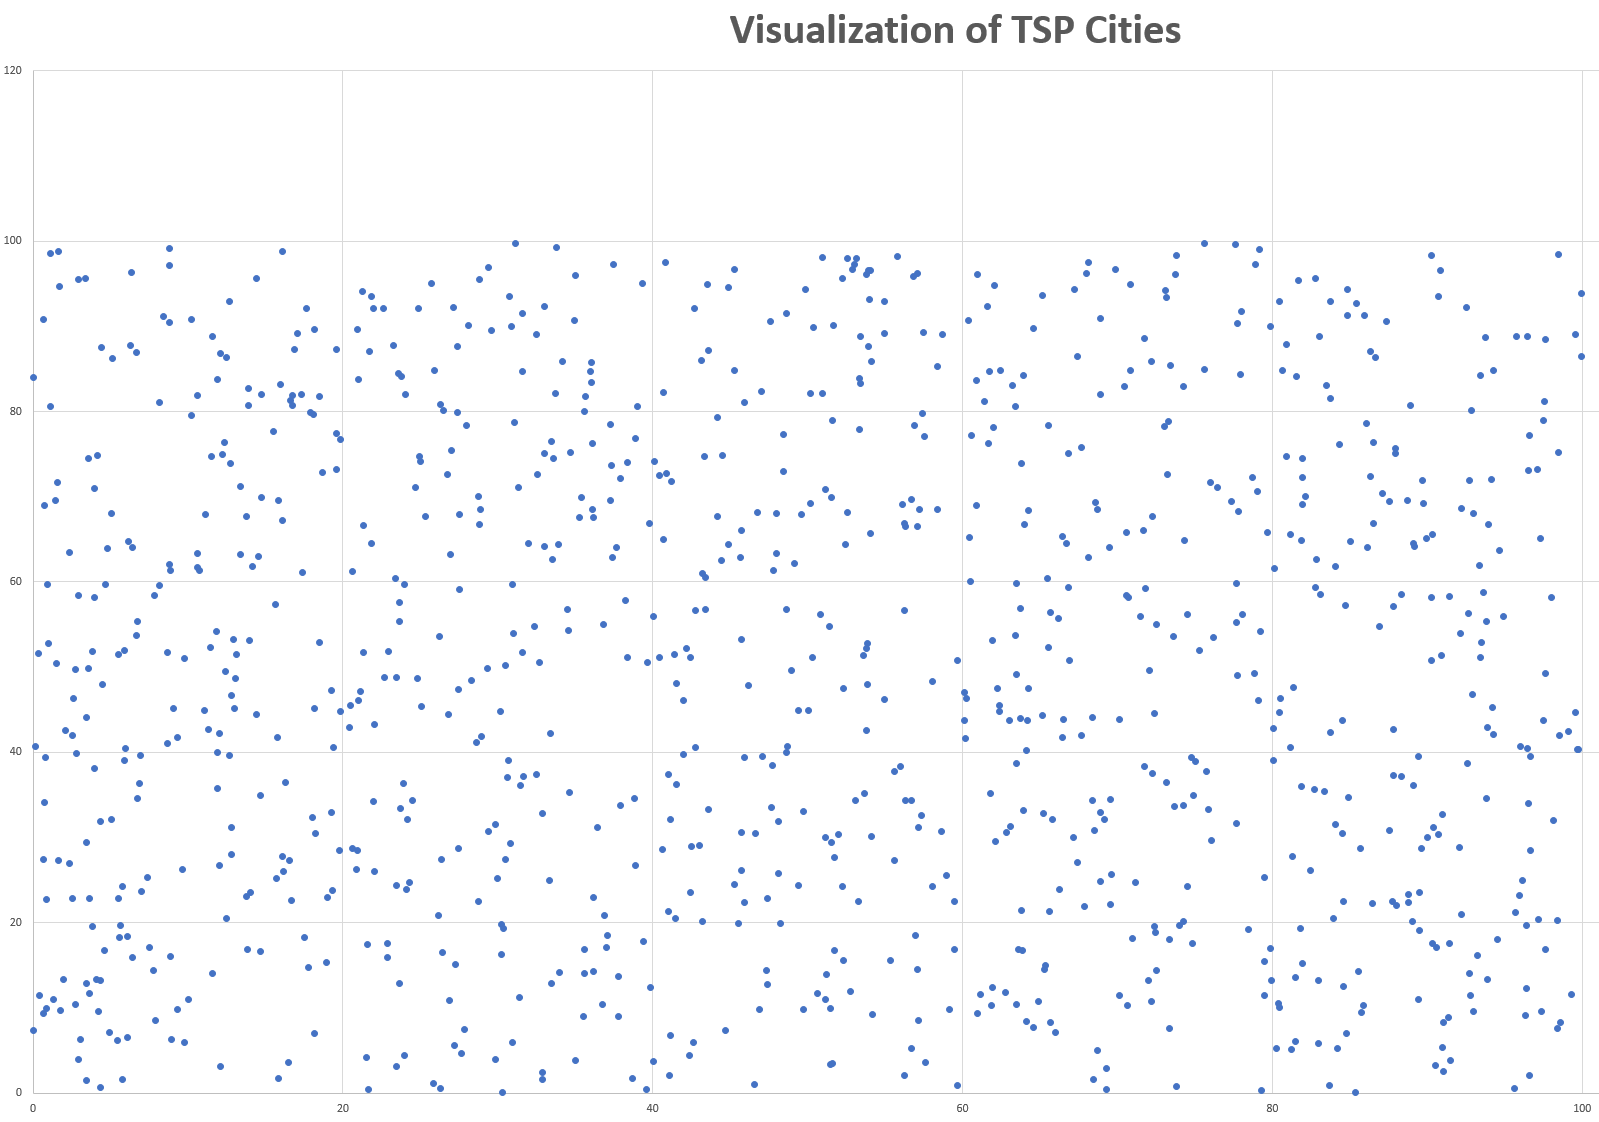

In [22]:
import PIL.Image as pilimg
pure_img = pilimg.open('visualization_cities.PNG')
pure_img

In [23]:
#우리의 데이터
print(cities[:3])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211']]


# k-means

In [24]:
from sklearn.cluster import KMeans
k= 10 # 클러스터의 개수를 미리 지정(0~9)
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)
print("y_pred의 개수 : ",len(y_pred))
print(y_pred[:50])

y_pred의 개수 :  1000
[1 6 9 0 4 1 9 4 0 1 8 7 1 9 9 7 1 8 5 8 7 4 8 0 2 3 3 7 3 1 4 4 2 6 4 2 2
 0 6 5 6 2 2 8 2 0 7 3 5 4]


In [25]:
kmeans.cluster_centers_

array([[41.06455918, 65.7722115 ],
       [43.5336032 , 18.63163719],
       [87.36586153, 43.43272062],
       [13.61600691, 50.0164672 ],
       [85.56722932, 78.14269689],
       [81.02510935, 14.15542172],
       [12.62474014, 16.71325839],
       [18.63615365, 85.42280004],
       [61.29366864, 45.42371056],
       [58.45036543, 88.48672054]])

In [26]:
kmeans.cluster_centers_[0]

array([41.06455918, 65.7722115 ])

In [27]:
x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen

[41.06455918438726,
 43.53360319947893,
 87.3658615326057,
 13.616006909478855,
 85.56722932350756,
 81.02510934535047,
 12.62474014307034,
 18.63615365074424,
 61.2936686353447,
 58.45036542766421]

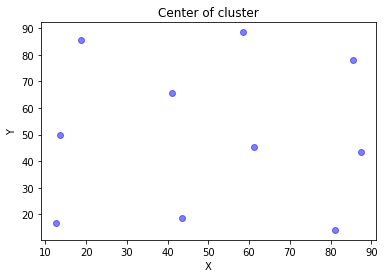

In [30]:
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
#scatter plot 데이터를 생성
x = x_cen
y = y_cen

plt.scatter(x,y,c='b',alpha= 0.5) #->그래프의 객체 생성
#alpha는 점들의 크기 label은 설명란
#plt.legend(loc = 'upper right') #밑에 Scatter point 박스의 위치를 선정 
plt.xlabel('X') #--->x축의 제목
plt.ylabel('Y') #--->y축의 제목
plt.title("Center of cluster") # ---> 그래프 제목

plt.show()  #-> 그래프를 출력

# 데이터 분할

In [31]:
index_0 = []
index_1 = []
index_2 = []
index_3 = []
index_4 = []
index_5 = []
index_6 = []
index_7 = []
index_8 = []
index_9 = []
for idx in range (0,1000):
    if y_pred[idx] == 0:
        index_0.append(int(idx))
        
    elif y_pred[idx] == 1:
        index_1.append(int(idx))
        
    elif  y_pred[idx] == 2:
        index_2.append(int(idx))
        
    elif  y_pred[idx] == 3:
        index_3.append(int(idx))  
        
    elif  y_pred[idx] == 4:
        index_4.append(int(idx))     
        
    elif  y_pred[idx] == 5:
        index_5.append(int(idx))  
        
    elif  y_pred[idx] == 6:
        index_6.append(int(idx))
        
    elif  y_pred[idx] == 7:
        index_7.append(int(idx))
        
    elif  y_pred[idx] == 8:
        index_8.append(int(idx))
        
    else:
        index_9.append(int(idx))        
    

In [32]:
#이중배열로 해결해보자
index_total = []
index_total.append(index_0)
index_total.append(index_1)
index_total.append(index_2)
index_total.append(index_3)
index_total.append(index_4)
index_total.append(index_5)
index_total.append(index_6)
index_total.append(index_7)
index_total.append(index_8)
index_total.append(index_9)

In [33]:
print(index_total[5])

[18, 39, 48, 53, 59, 75, 89, 99, 109, 117, 136, 147, 151, 165, 173, 176, 177, 186, 198, 200, 204, 214, 215, 243, 244, 248, 249, 259, 288, 295, 299, 305, 317, 321, 340, 341, 366, 369, 384, 400, 403, 405, 407, 411, 412, 424, 443, 463, 472, 473, 478, 498, 505, 509, 512, 514, 519, 530, 532, 553, 555, 557, 578, 583, 591, 599, 603, 613, 640, 650, 676, 678, 682, 683, 687, 688, 705, 722, 725, 728, 766, 776, 785, 787, 788, 806, 809, 820, 839, 842, 846, 847, 872, 880, 883, 892, 903, 904, 905, 926, 935, 960, 964, 969, 970, 979, 984, 985, 991, 996, 998]


In [34]:
print("index_0 : ",len(index_0), "\n","index_1 : ",len(index_1), "\n","index_2 : ",len(index_2), "\n","index_3 : ",len(index_3), "\n","index_4 : ",len(index_4), "\n",
      "index_5 : ",len(index_5), "\n","index_6 : ",len(index_6), "\n","index_7 : ",len(index_7), "\n","index_8 : ",len(index_8), "\n","index_9 : ",len(index_9))

index_0 :  94 
 index_1 :  112 
 index_2 :  81 
 index_3 :  114 
 index_4 :  100 
 index_5 :  111 
 index_6 :  102 
 index_7 :  106 
 index_8 :  94 
 index_9 :  86


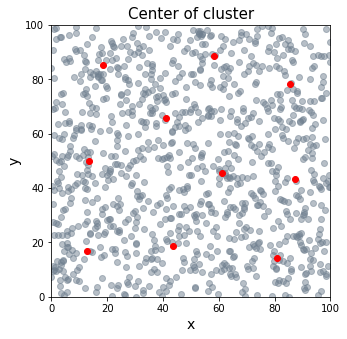

In [35]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Center of cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for idx in range(0,10):
    for m in index_total[idx]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")

plt.scatter(x_cen,y_cen,c='r') # cluster의 center를 빨강으로 표시

plt.show()




# 가시화

In [36]:
print(cities[:5])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214']]


In [37]:
#print(index_0[2])
print(cities[index_0[2]])
print(cities[index_0[2]][0])

['38.34965160669239', '74.01538577420033']
38.34965160669239


In [38]:
print(index_total[5])
count=0
for i in index_total[5]:
    print(cities[i][0])
    count = count+1
    if count== 10:
        break

[18, 39, 48, 53, 59, 75, 89, 99, 109, 117, 136, 147, 151, 165, 173, 176, 177, 186, 198, 200, 204, 214, 215, 243, 244, 248, 249, 259, 288, 295, 299, 305, 317, 321, 340, 341, 366, 369, 384, 400, 403, 405, 407, 411, 412, 424, 443, 463, 472, 473, 478, 498, 505, 509, 512, 514, 519, 530, 532, 553, 555, 557, 578, 583, 591, 599, 603, 613, 640, 650, 676, 678, 682, 683, 687, 688, 705, 722, 725, 728, 766, 776, 785, 787, 788, 806, 809, 820, 839, 842, 846, 847, 872, 880, 883, 892, 903, 904, 905, 926, 935, 960, 964, 969, 970, 979, 984, 985, 991, 996, 998]
83.64758869867107
74.27810748008527
63.79548246465002
63.608141225396366
95.66942871914218
73.80857211673812
96.38167418777395
98.40106025700763
95.61330669046303
64.54500084924776


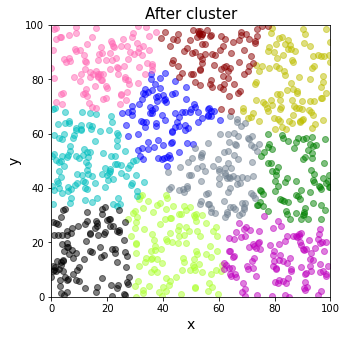

In [39]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")

#c = 'b,g,r,c,y,m,k,w'  -> color

#plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
#plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.show()




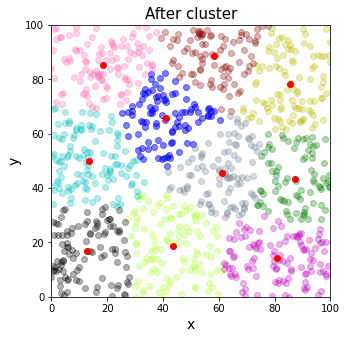

In [40]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="darkred")
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.show()  #-> 그래프를 출력
#c = 'b,g,r,c,y,m,k,w'  -> color



# BFS구현

tree를 직접 구현하기 까다로움     
idea: tree 부분만 handwritting 해보자     
cluster 내부도 알고리즘으로 구현       
내부 + 외부

-----------------------           
center로만 생각 or 정말 이전한 거리 계산

# 1. center로만 생각

In [41]:
print("x_cen : ",x_cen)
print(" ")
print("y_cen : ",y_cen)

x_cen :  [41.06455918438726, 43.53360319947893, 87.3658615326057, 13.616006909478855, 85.56722932350756, 81.02510934535047, 12.62474014307034, 18.63615365074424, 61.2936686353447, 58.45036542766421]
 
y_cen :  [65.77221150404259, 18.63163718969008, 43.432720618296244, 50.016467202285256, 78.14269688808513, 14.15542171571353, 16.713258388870628, 85.42280004095863, 45.42371056272928, 88.48672054048265]


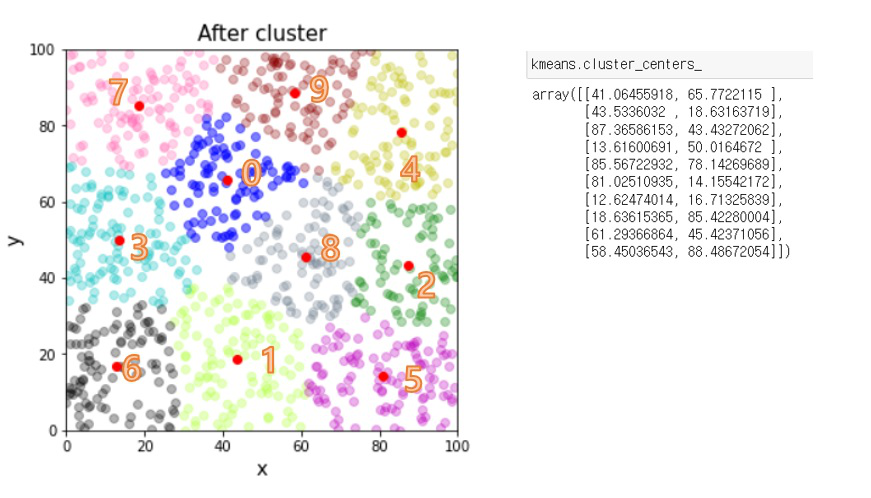

In [177]:
import PIL.Image as pilimg
center_img = pilimg.open('Center_number.jpg')
center_img

In [43]:
kmeans.cluster_centers_

array([[41.06455918, 65.7722115 ],
       [43.5336032 , 18.63163719],
       [87.36586153, 43.43272062],
       [13.61600691, 50.0164672 ],
       [85.56722932, 78.14269689],
       [81.02510935, 14.15542172],
       [12.62474014, 16.71325839],
       [18.63615365, 85.42280004],
       [61.29366864, 45.42371056],
       [58.45036543, 88.48672054]])

In [44]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

In [45]:
distance(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1])

47.20518959855421

In [46]:
NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp_cen_dis = []
cen_dis = []
temp=100
i=0
for j in range(0,NUMBER_OF_CLUSTER):
    if i==j: #예외처리
        pass
    else:
        if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
            index_min_distance = j
            temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
            temp_cen_dis.append(j)
        else:
            pass
cen_dis.append(max(temp_cen_dis))
        

In [47]:
cen_dis

[9]

center 간의 거리를 확인하고 싶으면 아래 코드를 돌리기

In [48]:
for i in range (0,10):
    print("target : ", i)
    for k in range (0,10):
        if(i==k):
            pass
        else:
            print(distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k]))
    

target :  0
47.20518959855421
51.408787694084786
31.649115319242938
46.19000495938661
65.27739698562903
56.70629760317185
29.819104691937433
28.692827670646967
28.604460832102486
target :  1
47.20518959855421
50.36229353211234
43.35977539945198
72.85871225571147
37.757774537906634
30.968338551870254
71.2807297174802
32.14397486174587
71.42998295756756
target :  2
51.408787694084786
50.36229353211234
74.04314131649556
34.756546584390584
29.956057306183556
79.37357802439652
80.54153906803312
26.148102864850838
53.53474408254194
target :  3
31.649115319242938
43.35977539945198
74.04314131649556
77.25324072950853
76.35444764124615
33.317958026747135
35.76045690964754
47.89835948335056
59.07689984792928
target :  4
46.19000495938661
72.85871225571147
34.756546584390584
77.25324072950853
64.14828320291024
95.36342402707119
67.32584045245665
40.739879904594076
29.0228036699946
target :  5
65.27739698562903
37.757774537906634
29.956057306183556
76.35444764124615
64.14828320291024
68.4481777365

target :  0
The nearest node is :  9
target :  1
The nearest node is :  6
target :  2
The nearest node is :  8
target :  3
The nearest node is :  0
target :  4
The nearest node is :  9
target :  5
The nearest node is :  2
target :  6
The nearest node is :  1
target :  7
The nearest node is :  0
target :  8
The nearest node is :  2
target :  9
The nearest node is :  0


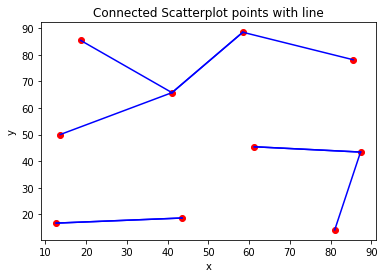

In [49]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
for i in range (0,NUMBER_OF_CLUSTER):
    print("target : ", i)
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    print("The nearest node is : ",min_index)
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

plt.show()  #-> 그래프를 출력

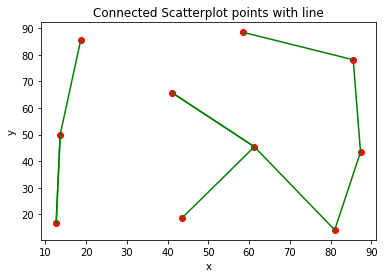

In [50]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center2 = []
for i in range (0,NUMBER_OF_CLUSTER):
    #print("target : ", i)
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    #print("The nearest node is : ",min_index)
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

plt.show()  #-> 그래프를 출력

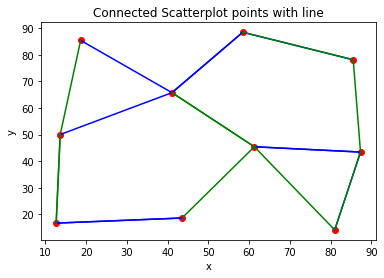

In [51]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected Scatterplot points with line")
plt.xlabel("x")
plt.ylabel("y")


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp=100
distance_center = []
distance_center2 = []

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="b")

for i in range (0,NUMBER_OF_CLUSTER):
    for k in range (0,NUMBER_OF_CLUSTER):
        if(i==k or k==distance_center[i]):
            pass
        else:
            if(temp>=distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])):
                min_index=k
                temp =distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[k])
    distance_center2.append(min_index)
    temp=100
    
    x= [float(kmeans.cluster_centers_[i][0]),float(kmeans.cluster_centers_[min_index][0])]
    y= [float(kmeans.cluster_centers_[i][1]),float(kmeans.cluster_centers_[min_index][1])] 
    plt.plot(x,y,c="g")

plt.show()  #-> 그래프를 출력

In [178]:
ans =[0,9,4,2,5,8,1,6,3,7] #<- 그냥 눈으로 풀었음

In [53]:
distance_center

[9, 6, 8, 0, 9, 2, 1, 0, 2, 0]

In [54]:
distance_center2

[8, 8, 5, 6, 2, 8, 3, 3, 0, 4]

idea : 가장 인접한 곳이 많은 node를 시작 과 종료 node로 잡아보자    
0는 파란색이 많고 8은 초록색이 많으니깐 0를 선택

In [55]:
import numpy as np
center_bin  = (np.bincount(np.array(distance_center)))
center_of_center = np.argmax(center_bin)
center_of_center

0

In [56]:
center_bin2 = (np.bincount(np.array(distance_center2)))
center_of_center2 = np.argmax(center_bin2)
center_of_center2

8

# BFS

idea :결국엔 시작 노드와 가까운 순서대로 이동을 하게 되는데 path에 weight 존재    
즉, greedy search와 크게 차이 x

*확장성을 고려하여서 list 구조로 짜보자

In [57]:
mylist=[[6,9,4],[4,5],[5,7,8],[6,8],[0,1],[1,2,6,7],[0,5,9,3],[2,5],[2,3],[6,0]]
print(mylist[7])

[2, 5]


---------------------------------------------------------------------------------------------------------------------------

위의 경로는 내가 보기 편할려고 짠거지 실제로는 모든 경로 갈 수 있다.

# 일반화

In [58]:

#current_node에서 가장 가까운 좌표를 구해보자
kmeans.cluster_centers_

array([[41.06455918, 65.7722115 ],
       [43.5336032 , 18.63163719],
       [87.36586153, 43.43272062],
       [13.61600691, 50.0164672 ],
       [85.56722932, 78.14269689],
       [81.02510935, 14.15542172],
       [12.62474014, 16.71325839],
       [18.63615365, 85.42280004],
       [61.29366864, 45.42371056],
       [58.45036543, 88.48672054]])

In [64]:
exp_1 =[1,3]
exp_2 =[5,0]

def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

distance(exp_1,exp_2) # 기대값 5

5.0

In [68]:
print(len(kmeans.cluster_centers_))

10


In [106]:
a =deque(['원래 맨앞',1,2,3,4,5,6,'원래 맨뒤'])
a.append('나중에 넣은거')
print(a)
print("pop left 한거 : ",a.popleft())
print("pop left 한 결과 : ",a)
print("pop 한거 : ",a.pop())
print("pop한 결과 : ",a)

deque(['원래 맨앞', 1, 2, 3, 4, 5, 6, '원래 맨뒤', '나중에 넣은거'])
pop left 한거 :  원래 맨앞
pop left 한 결과 :  deque([1, 2, 3, 4, 5, 6, '원래 맨뒤', '나중에 넣은거'])
pop 한거 :  나중에 넣은거
pop한 결과 :  deque([1, 2, 3, 4, 5, 6, '원래 맨뒤'])


In [180]:
from collections import deque
path = deque([])
path

deque([])

In [181]:
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급

start_node_num = 0

#target_cluster = 조사할 cluster
#current_node_num = #현재까지 온 마지막 node의 번호
#path 지금까지의 경로

def greedy_search(target_cluster, start_node_num, path):
    if len(path)==0: #처음 집어 넣는 거
        path.append(start_node_num)
    else:
        current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
        #print(current_node_num)
        path.append(current_node_num) #path 는 그대로 있어야지
    
        min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
         #current node는 가장 최근에 넣은 node
        for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
            if (current_node_num == node_num): #자기 자신은 예외처리
                pass
            else:
                if node_num in path:
                    pass
                else:
                    if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                        next_node_num = node_num
                        min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                        #print(min_distance)
                    else:
                        pass
        
        path.append(next_node_num) #갱신
       
    
    
    return path

greedy_search(target_cluster,start_node_num,path)
print(path)
        

deque([0])


In [182]:
greedy_search(target_cluster,start_node_num,path)
print(path)

deque([0, 9])


In [183]:
from collections import deque
path = deque([])
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
start_node_num = 0

#target_cluster = 조사할 cluster
#current_node_num = #현재까지 온 마지막 node의 번호
#path 지금까지의 경로

def greedy_path(target_cluster, start_node_num, path):
    
    for i in range(0,len(target_cluster)):
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
    
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
             #current node는 가장 최근에 넣은 node
            for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
        
            path.append(next_node_num) #갱신
       
    
    
    return path

greedy_path(target_cluster,start_node_num,path)
print(path)
        

deque([0, 9, 4, 2, 8, 1, 6, 3, 7, 5])


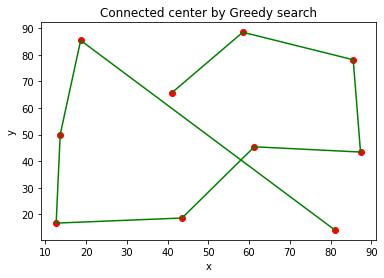

In [184]:
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(kmeans.cluster_centers_[path[i]][0]))
    y.append(float(kmeans.cluster_centers_[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

In [185]:
print(x)

[41.06455918438726, 58.45036542766421, 85.56722932350756, 87.3658615326057, 61.2936686353447, 43.53360319947893, 12.62474014307034, 13.616006909478855, 18.63615365074424, 81.02510934535047]


In [186]:
kmeans.cluster_centers_

array([[41.06455918, 65.7722115 ],
       [43.5336032 , 18.63163719],
       [87.36586153, 43.43272062],
       [13.61600691, 50.0164672 ],
       [85.56722932, 78.14269689],
       [81.02510935, 14.15542172],
       [12.62474014, 16.71325839],
       [18.63615365, 85.42280004],
       [61.29366864, 45.42371056],
       [58.45036543, 88.48672054]])

In [187]:
path

deque([0, 9, 4, 2, 8, 1, 6, 3, 7, 5])

cluster 내부가 이상적이라 가정해도 non optimal